# Transformações geométricas - APS de Visão

## Criação da imagem

Vamos gerar uma imagem de entrada com algumas coordenadas conhecidas.  Desta seção você só vai precisar das coordenadas dos pontos na imagem de entrada e na imagem de saída

In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import cv2
import numpy as np
from sympy import symbols
from sympy import lambdify
from sympy.core.trace import Tr
from IPython.core.display import display_pretty
from sympy.printing.latex import *
from sympy import init_printing; init_printing()
from sympy.interactive import printing
printing.init_printing(use_latex=True)
from IPython.display import display
import sympy as sp
import math
from scipy import stats
import statsmodels.api as sm
from pylab import array
%matplotlib inline
sp_x = 30
sp_y = 30
x_blocks = 6
y_blocks = 6

C:\Users\Alexandre\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Cria uma imagem RGB  em branco
blank = 255*np.ones((sp_x * x_blocks,sp_y*y_blocks,3), np.uint8)

In [3]:
# Coordenadas de entrada de alguns pontos
points = [[1,1],
          [5,1],
          [1,3],
          [3,3],
          [5,3],
          [1,5],
          [5,5]]

In [4]:
# Cores a usar para os pontos
point_colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

## Coordenadas dos pontos na imagem de entrada

Este loop imprime as coordenadas.

As cores dos pontos servem para identificá-los

In [5]:
sp_x = 30 # x spacing
sp_y = 30 # y spacing
point_size = 5
print("Posição dos pontos: (x_entrada, y_entrada)")

for i in range(len(points)):
    point_color = [int(255*canal) for canal in colors.colorConverter.colors[point_colors[i]]]
    point_position = (sp_x*points[i][0], sp_y*points[i][1])
    print(point_position)
    cv2.circle(blank,point_position, point_size, point_color, -1)


Posição dos pontos: (x_entrada, y_entrada)
(30, 30)
(150, 30)
(30, 90)
(90, 90)
(150, 90)
(30, 150)
(150, 150)


## Imagem de entrada

Tudo o que foi geito até agora teve como única finalidade gerar esta imagem, que será gravada no arquivo `dots_pattern.png` .

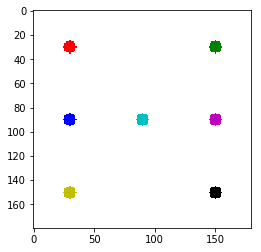

In [6]:
plt.imshow(blank)

Se precisar abrir a imagem fora deste *notebook*, use o arquivo `dots_pattern.png`


In [7]:
cv2.imwrite("dots_pattern.png", blank)

True

## Padrão de saída

Foi aplicada uma transformação à imagem de entrada, que gerou o seguinte padrão de saída:

In [8]:
saida = cv2.imread("patterns_transformed.png")

saida_rgb = cv2.cvtColor(saida, cv2.COLOR_BGR2RGB)

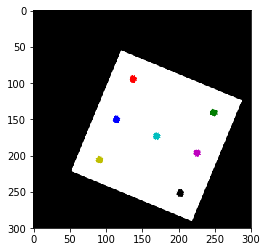

In [9]:
plt.imshow(saida)

Sabe-se que a imagem de saída é igual a uma combinação de rotações em torno de um ponto arbitrário e  redimensionamentos (escala) da imagem de entrada. Para simplificar, assuma que o redimensionamento é igual nos eixos $x$ e $y$

Cada ponto da imagem de saída está relacionado à sua posição na imagem de entrada pela seguinte transformação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 = 
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix} 
$$

Na equação acima:

$\alpha = escala \cdot \cos(\theta)$ 

$\beta = escala \cdot \sin(\theta) $ 

$x_{entrada}$ é a posição $x$ de cada pixel na imagem de entrada

$y_{entrada}$ é a posição $y$ de cada pixel na imagem de entrada

$center$ é o centro de rotação

$x_{saída}$ é a coordenada $x$ do pixel na imagem de saída

$y_{saída}$ é a coordenada $y$ do pixel na imagem de saída


Com translação:

$$
\begin{pmatrix}
x_{saida} \\
y_{saida} \\
1
\end{pmatrix}
 =
\begin{pmatrix}
   \alpha &\beta &(1-\alpha \cdot center.x - \beta \cdot center.y) + t_x \\
   -\beta & \alpha & \beta \cdot center.x + (1 - \alpha \cdot center.y) + t_y \\ 0 & 0 & 1
\end{pmatrix} \cdot \begin{pmatrix} x_{entrada} \\ y_{entrada} \\ 1 \end{pmatrix}
$$



# Matrizes de transformação com rotação, translação e escala


O objetivo desta seção é só entender a forma da transformação de saída expressa na equação que fecha a seção anterior.

Uma matriz de translação por uma distância $ [ x_t   y_t ]$ em 2D é:

$$
T = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz de rotação por um ângulo $\theta$ é:

$$
R = \begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Uma matriz que aplica um fator de escala  $s$ igual nos eixos $x$ e $y$ é:


$$
S = \begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$


Uma transformação genérica, composta de rotação, escala e transação (nesta ordem) é dada por:

$$
M = T \cdot S \cdot R
$$

Ou seja:
$$
M = \begin{pmatrix} 1 & 0 & x_t \\
0 & 1 & y_t \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} s & 0  & 0 \\
0 & s & 0 \\
0 & 0 & 1 
\end{pmatrix}
\cdot
\begin{pmatrix} \cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 
\end{pmatrix}
$$

Multiplicando as três matrizes, temos que uma transformação afim composta de rotação, escala e translação é:

$$
M = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix}
$$


Desta forma, um ponto de entrada representado por $( x_{i}, y_{i} ) $ será transformado num ponto de saída $(x_{saida}, y_{saida})$ quando multiplicado pela matrix $M$


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} s\cdot\cos(\theta) & -s\cdot\sin(\theta) & x_t \\
-s\cdot\sin(\theta) & -s\cdot\cos(\theta) & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$

Teremos, então:

$$
x_{saida} = x_{i} \cdot s \cdot \cos(\theta) - y_{i} \cdot s \cdot \sin(\theta) + x_t $$
e 
$$ y_{saida} = - x_{i} \cdot s \cdot \sin(\theta) - y_{i} \cdot s \cdot \cos(\theta) + y_t
$$

Por simplicidade, ao estimar uma transformação, ajuda trabalhar com as seguintes relações:

$\alpha =  s \cdot \cos(\theta)$

e 

$\beta = s \cdot \sin(\theta) $

E encarar a matriz da seguinte forma:


$$
\begin{pmatrix}x_{saida} \\ y_{saida} \end{pmatrix} = \begin{pmatrix} \alpha & -\beta & x_t \\
-\beta & -\alpha & y_t \\
0 & 0 & 1 
\end{pmatrix} \cdot \begin{pmatrix} x_{i} \\ y_{i} \end{pmatrix} 
$$



# APS Visão

Responda (no IPython Notebook): 

1. Quantos graus de liberdade (variáveis) determinam a transformação acima?

2. Supondo que a transformação aplicada para transformar a imagem de entrada na imagem do arquivo `patterns_transformed.png` é desconhecida, é possível descobrir qual é esta transformação? Como?

3. Crie uma tabela para os 7 pontos de entrada fornecidos em que constem quais suas posições na imagem de entrada e depois quais suas posições após transformados, na imagem de saída.

4. Considerando o número de variáveis da matriz de transformação fornecida, de quantas correspondências $p_{entrada} \Rightarrow p_{saida}$ você precisa para descobrir qual é a matriz?

5. Por que poderia ser útil usar **mais** correspondências do que a resposta que você deu no item anterior?

6. Expanda a equação da transformação usando os pontos de entrada e saída de sua tabela até ter um sistema sobredeterminado. <font color=red> Reserve pelo menos 1 hora para esta atividade - trabalhoso </font>. Talvez você ache útil aprender a usar um *Computer Algebra System* para fazer isso, por exemplo o Sympy ou o Maxima (faça até este item pelo menos).

7. A partir do sistema sobredeterminado que você encontrou no item anterior, resolva e estime qual é a transformação que foi usada para converter a imagem de entrada na imagem de saída. Você pode usar o método de *Least Squares* que está presente no *Scipy* ou o *RANSAC* da OpenCV, por exemplo. (OPCIONAL)

8. Aplique a transformação à imagem de entrada e verifique se o resultado que obteve se assemelha à imagem de saída. A função da OpenCV que permite que você faça isso é a *cv2.warpAffine()* (OPCIONAL)

9. Abra a imagem `patterns_transformed.png`  na tela do seu celular e imprima na tela em tempo real a rotação da imagem lendo da webcam com USB (SUPER OPCIONAL)

1- A transformação acima tem 4 graus de liberdade.

2- A transformação pode ser descoberta através de dois pares de pontos correspondentes entre a entrada e a saída. Com dois pontos (a1',b1') e (a2',b2') da saida correspondentes aos pontos (a1,b1) e (a2,b2) da entrada, é possível criar um sistema para descobrir a transformação.

3-

In [13]:
alpha, beta, c_x, c_y,  t_x, t_y, theta, scale, a, b =  sp.symbols("alpha, beta, c_x, c_y, t_x, t_y, theta, scale, a, b")

def make_translation(transx, transy):
    return sp.Matrix([[1, 0, transx],[0, 1, transy ],[0, 0, 1]])

def make_rotation(angle):
    a = sp.cos(angle)
    b = sp.sin(angle)
    return sp.Matrix([[a, b, 0],[-b, a, 0 ],[0, 0, 1]])

def make_rotation_scale_a_b():
    return sp.Matrix([[a, b, 0],[-b, a, 0 ],[0, 0, 1]])


def make_scale(scale_f):
    return sp.Matrix([[scale, 0, 0],[0, scale, 0 ],[0, 0, 1]])
    
def make_column_point(x, y):
    return sp.Matrix([[x],[y],[1]])

p0 = make_column_point(0, 0)
p1 = make_column_point(30, 30)
p2 = make_column_point(150, 30)
p3 = make_column_point(30, 90)
p4 = make_column_point(90, 90)
p5 = make_column_point(150, 90)
p6 = make_column_point(30, 150)

points_entrada = [p0, p1, p2, p3, p4, p5, p6]


xs0, ys0, xs1, ys1, xs2, ys2, xs3, ys3, xs4, ys4, xs5, ys5, xs6, ys6 = sp.symbols("x_s0, y_s0, x_s1, y_s1, x_s2, y_s2, x_s3, y_s3, x_s4, y_s4, x_s5, y_s5, x_s6, y_s6")

ps0 = make_column_point(120, 55)
ps1 = make_column_point(140, 95)
ps2 = make_column_point(250, 140)
ps3 = make_column_point(110, 150)
ps4 = make_column_point(170, 175)
ps5 = make_column_point(225, 200)
ps6 = make_column_point(95, 205)

points_saida = [ps0, ps1, ps2, ps3, ps4, ps5, ps6]

In [14]:
points_entrada

⎡⎡0⎤  ⎡30⎤  ⎡150⎤  ⎡30⎤  ⎡90⎤  ⎡150⎤  ⎡30 ⎤⎤
⎢⎢ ⎥  ⎢  ⎥  ⎢   ⎥  ⎢  ⎥  ⎢  ⎥  ⎢   ⎥  ⎢   ⎥⎥
⎢⎢0⎥, ⎢30⎥, ⎢30 ⎥, ⎢90⎥, ⎢90⎥, ⎢90 ⎥, ⎢150⎥⎥
⎢⎢ ⎥  ⎢  ⎥  ⎢   ⎥  ⎢  ⎥  ⎢  ⎥  ⎢   ⎥  ⎢   ⎥⎥
⎣⎣1⎦  ⎣1 ⎦  ⎣ 1 ⎦  ⎣1 ⎦  ⎣1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦⎦

In [17]:
points_saida

⎡⎡120⎤  ⎡140⎤  ⎡250⎤  ⎡110⎤  ⎡170⎤  ⎡225⎤  ⎡95 ⎤⎤
⎢⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥⎥
⎢⎢55 ⎥, ⎢95 ⎥, ⎢140⎥, ⎢150⎥, ⎢175⎥, ⎢200⎥, ⎢205⎥⎥
⎢⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥  ⎢   ⎥⎥
⎣⎣ 1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦  ⎣ 1 ⎦⎦

4- São necessárias 4 correspondências para descobrir qual é a matriz

5- Pois um maior número de correspondências a margem de erro seria menor

6-

In [18]:
rotab = make_rotation_scale_a_b()
trans = make_translation(t_x, t_y)
M = trans*rotab
equations = []
system_eq = []
left_side = []

for p in points_entrada:
    produto = M*p
    equations.append(produto)

print("Equations of the overdetermined system")
    
for i in range(len(equations)):
    for j in range(len(equations[i][:-1])): # -1 excludes the homogeneous coordinate (extra 1 at the end)
        eq = equations[i][j]-points_saida[i][j]
        left_side.append(equations[i][j])
        system_eq.append(eq)

        
for equation in system_eq:
    display(equation)

Equations of the overdetermined system


7-

In [22]:
a = np.array([[30,30],[30,-30]])
b = np.array([20,40])
x = np.linalg.solve(a,b)
x

array([ 1.        , -0.33333333])

$a = s \cdot \cos(\theta) = 1 $; $b = -s \cdot \sin(\theta) = -0.333$


8-

In [29]:
tx = 120
ty = 55
theta = 18.34
s = 1.05
trans = make_translation(tx, ty)
rotat = make_rotation(theta)
scal = make_scale(s)
m = trans*rotat*scal
m = array(m) 

In [30]:
img = cv2.imread("dots_pattern.png")
rows,cols,ch = img.shape

# Source points
srcTri = np.array([(0,0),(30,30),(150,30)], np.float32)

# Corresponding Destination Points. Remember, both sets are of float32 type
dstTri = np.array([(120,55),(140,95),(250,140)],np.float32)

# Affine Transformation
warp_mat = cv2.getAffineTransform(srcTri,dstTri)   # Generating affine transform matrix of size 2x3
dst = cv2.warpAffine(img,warp_mat,(cols,rows))     # Now transform the image, notice dst_size=(cols,rows), not (rows,cols)

# Image Rotation
center = (cols/2,rows/2)                           # Center point about which image is transformed
angle = math.radians(-theta)                                    # Angle, remember negative angle denotes clockwise rotation
scale = 0.5

# Isotropic scale factor.

rot_mat = cv2.getRotationMatrix2D(center,angle,scale) # Rotation matrix generated
dst_rot = cv2.warpAffine(dst,rot_mat,(cols,rows))     # Now transform the image wrt rotation matrix

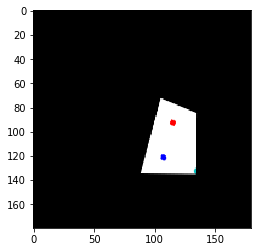

In [31]:
plt.imshow(dst_rot)

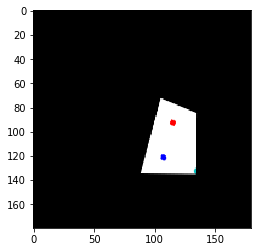

In [32]:
plt.imshow(dst_rot)